In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from nltk.corpus import stopwords
from nltk.cluster import KMeansClusterer, cosine_distance
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.feature_extraction import text
import nltk
import re
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import silhouette_score
import matplotlib as mpl
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
book = pd.read_csv('book.csv')

## Filter meaningless words

In [4]:
intro_desc_title = book['intro'].astype(str) + '' + book['product_desc'].astype(str) + '' + book['title'].astype(str)
intro_desc =  book['intro'].astype(str) + '' + book['product_desc'].astype(str)

In [5]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(["cook", 'cooking', 'cooker','cookbook','cookers','book','food','recipes'])

In [6]:
tfidf_vect = TfidfVectorizer(stop_words=my_stop_words,min_df=5) 
dtm2= tfidf_vect.fit_transform(intro_desc)

C:\anaconda\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


## Silhouette method to find optimal number of clusters

In [8]:
sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(dtm3)
  labels = kmeans.labels_
  sil.append(silhouette_score(dtm2, labels, metric = 'euclidean'))

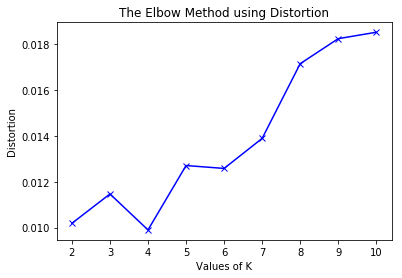

In [9]:
k = range(2,11)
plt.plot(k, sil, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

## Kmeans to run clustering

In [12]:
num_clusters=3

clusterer = KMeansClusterer(num_clusters, \
                            cosine_distance, \
                            repeats=20)

clusters = clusterer.cluster(dtm2.toarray(), \
                             assign_clusters=True)
centroids=np.array(clusterer.means())
sorted_centroids = centroids.argsort()[:, ::-1] 
voc_lookup= tfidf_vect.get_feature_names()

for i in range(num_clusters):
    top_words=[voc_lookup[word_index] for word_index in sorted_centroids[i, :20]]
    print("Cluster %d:\n %s " % (i, "; ".join(top_words)))

Cluster 0:
 vegan; pot; slow; free; instant; gluten; bread; pressure; meals; chicken; easy; delicious; dishes; time; healthy; make; new; kitchen; ingredients; recipe 
Cluster 1:
 diet; health; weight; keto; healthy; foods; dr; fat; eating; paleo; low; ketogenic; author; eat; loss; new; plan; carb; sugar; easy 
Cluster 2:
 new; kitchen; author; home; family; york; life; times; make; like; best; chef; world; read; cake; time; cooks; story; love; way 


## Multidimensional scaling MDS 

In [14]:
dist = 1 - cosine_similarity(dtm2)

MDS()

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1] #transform data to one dimension

In [17]:
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3'}

#set up cluster names using a dict
cluster_names = {0: 'easy to cook', 
                 1: 'diet & health', 
                 2: 'famous chefs'}

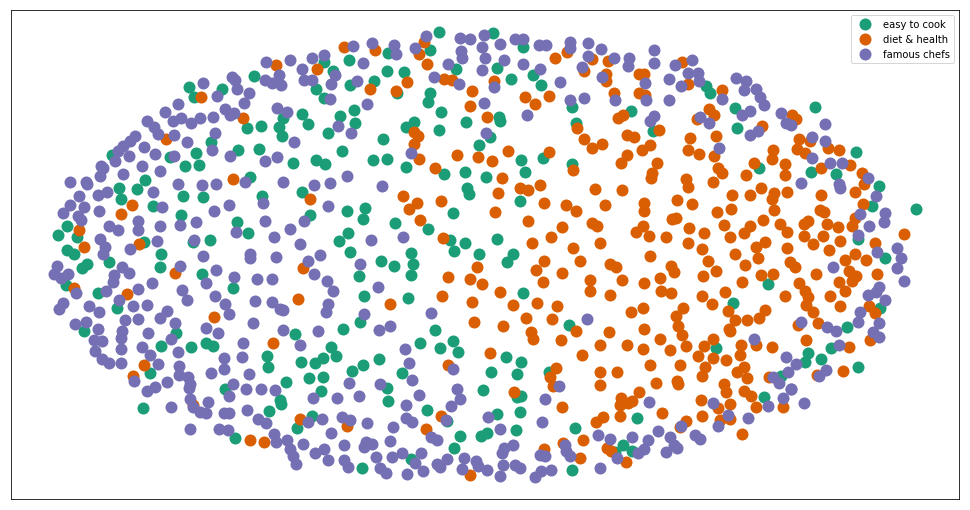

In [28]:
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

    
plt.show() #show the plot